In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import os

In [ ]:
columns = ('appId', 'name')
df_games_names = pd.concat([pd.read_csv('page{}_games.csv'.format(i), usecols=[1, 2], names=columns) for i in range(1, 6)])

df_games_names

,appId,name
0,271590,Grand Theft Auto V
1,1174180,Red Dead Redemption 2
2,1145360,Hades
3,715950,Divinity: Original Sin 2
4,391540,Undertale
...,...,...
11,1237970,Titanfall 2
12,584400,Sonic Mania
13,268500,XCOM 2
14,412830,STEINS;GATE


In [ ]:
columns = ('appId', 'user', 'rating', 'hours')
df_reviews = pd.concat([pd.read_csv('page{}_reviews.csv'.format(i), usecols=[0, 3, 6, 7], names=columns) for i in range(1, 6)], ignore_index=True)
df_reviews

,appId,user,rating,hours
0,1145360,76561198059680994,1,48.3
1,1145360,lalaso123,1,23.2
2,1145360,76561198008088676,1,5.1
3,1145360,YogurtRed,1,11.4
4,1145360,76561199095470163,1,22.8
...,...,...,...,...
976869,809230,7.65612E+16,1,41.6
976870,809230,7.65612E+16,1,63.6
976871,809230,7.65612E+16,1,19.1
976872,809230,7.65612E+16,1,136.6


In [ ]:
df_sentiments = pd.read_csv('sentiment.csv', names=['appId', 'user','sentiment'])
df_sentiments

,appId,user,sentiment
0,1145360,7.66E+16,0.4927
1,1145360,lalaso123,0.7857
2,1145360,7.66E+16,0.9799
3,1145360,YogurtRed,0.5563
4,1145360,7.66E+16,0.9236
...,...,...,...
976869,809230,7.66E+16,0.5267
976870,809230,7.66E+16,-0.5423
976871,809230,7.66E+16,0.0000
976872,809230,7.66E+16,0.4118


In [ ]:
df_reviews['sentiment'] = df_sentiments['sentiment']
df_reviews

,appId,user,rating,hours,sentiment
0,1145360,76561198059680994,1,48.3,0.4927
1,1145360,lalaso123,1,23.2,0.7857
2,1145360,76561198008088676,1,5.1,0.9799
3,1145360,YogurtRed,1,11.4,0.5563
4,1145360,76561199095470163,1,22.8,0.9236
...,...,...,...,...,...
976869,809230,7.65612E+16,1,41.6,0.5267
976870,809230,7.65612E+16,1,63.6,-0.5423
976871,809230,7.65612E+16,1,19.1,0.0000
976872,809230,7.65612E+16,1,136.6,0.4118


In [ ]:
indexNames = df_reviews[df_reviews['user'] == '#NAME?' ].index
df_reviews.drop(indexNames , inplace=True)
df_unique_reivews = df_reviews.drop_duplicates(subset=['appId', 'user'])
df_unique_reivews.shape

(877415, 5)

In [ ]:
df_unique_reivews

,appId,user,rating,hours,sentiment
0,1145360,76561198059680994,1,48.3,0.4927
1,1145360,lalaso123,1,23.2,0.7857
2,1145360,76561198008088676,1,5.1,0.9799
3,1145360,YogurtRed,1,11.4,0.5563
4,1145360,76561199095470163,1,22.8,0.9236
...,...,...,...,...,...
976834,809230,bhollowa123,1,393.7,0.9290
976840,809230,MessedUpHare,1,3.4,-0.0237
976842,809230,milkmouf,-1,0.9,-0.1027
976843,809230,Octavian1453,1,125.4,0.9879


In [ ]:
g = df_unique_reivews.groupby('user').agg('count')
df_unique_reivews = df_unique_reivews[df_unique_reivews['user'].isin(g[g['rating'] > 1].index)]

In [ ]:
g[g['rating'] > 1]

,appId,rating,hours,sentiment
user,,,,
----Werewolf---,3,3,3,3
--Legion--,2,2,2,2
--SaiyajiN,2,2,2,2
--Ulrich--,2,2,2,2
--depresso--,2,2,2,2
...,...,...,...,...
zzzwhiteboyzzz,2,2,2,2
zzzxggg,2,2,2,2
zzzzzzzzzx_x,3,3,3,3


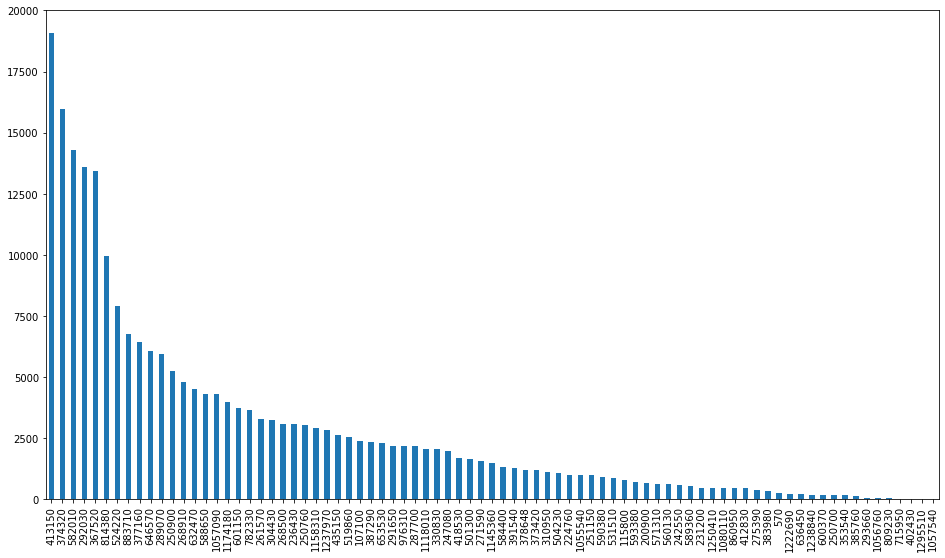

In [ ]:
df_unique_reivews.appId.value_counts().plot(kind='bar', figsize=(16,9))

In [ ]:
df_unique_reivews.appId.value_counts().describe()

count       81.000000
mean      2813.320988
std       3821.009339
min         21.000000
25%        468.000000
50%       1492.000000
75%       3252.000000
max      19061.000000
Name: appId, dtype: float64

In [ ]:
df_games_users = df_unique_reivews.pivot(
    index='appId',
    columns='user',
    values='sentiment'
).fillna(0)

df_games_users

user,----Werewolf---,--Legion--,--SaiyajiN,--Ulrich--,--depresso--,--infinite,-5k,-76561198091459618-,-Azsael-,-B-l-a-n-k-,-BJORGVIK-,-Caboose-,-Chanel-,-D-A-V-O-,-D14b0lIc5a1b0tD47k9t0p1ak54n-,-DampLamp-,-DeepDarkFantasy-,-Django-,-Fanta,-Godspeed-,-GwynBleidd,-ImGerik-,-JZ-,-Kelthor-,-Kubix,-Kyperstar-,-LegendarySlayer,-Meechy-,-Nerd,-Quarrel-,-Quinton-,-S-n-a-k-e-B-e-a-t-e-r-,-Somsok-,-T-,-Unknown21-,-Wei-,-_-lovely-_-,-_GOLD_-,-aquafina,-bye-,...,zweistein_Jimmy,zwenkel,zwheel94,zwienzixes,zwoop,zx111,zxSh1ny,zxmost,zxund,zxya,zxzc77,zycietocalareszta,zydoe,zydrateacademy,zygrot24,zylentis,zymes,zymlaibaklazan,zynen,zynetic,zynthetik,zynx66,zyondlafon,zyphir77,zypix,zyrareflex,zyrkan,zyrongames,zyrums,zyxwv2,zyzamo,zzayn,zzfuzzy,zzzeli,zzzkentucky,zzzwhiteboyzzz,zzzxggg,zzzzzzzzzx_x,zzzzzzzzzzz111,zzzzzzzzzzzzzzzzzzz12
appId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
570,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107100,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.7346,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.4215,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115800,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200900,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
224760,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.7479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222690,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1237970,0.0,0.0,0.0,0.0,0.4404,0.0,-0.4131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.7964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.6705,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5562,0.0,0.3818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1238840,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5667,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.

In [ ]:
hashmap = {appId: i for i, appId in enumerate(list(df_games_users.index))}
hashmap

{570: 0,
 107100: 1,
 115800: 2,
 200900: 3,
 224760: 4,
 231200: 5,
 236430: 6,
 242550: 7,
 247080: 8,
 250700: 9,
 250760: 10,
 250900: 11,
 251150: 12,
 261570: 13,
 268500: 14,
 268910: 15,
 271590: 16,
 275390: 17,
 287700: 18,
 289070: 19,
 291650: 20,
 292030: 21,
 293660: 22,
 304430: 23,
 310950: 24,
 330830: 25,
 353540: 26,
 367520: 27,
 373420: 28,
 374320: 29,
 377160: 30,
 378648: 31,
 383980: 32,
 385760: 33,
 387290: 34,
 391540: 35,
 402430: 36,
 412830: 37,
 413150: 38,
 418530: 39,
 435150: 40,
 501300: 41,
 504230: 42,
 519860: 43,
 524220: 44,
 531510: 45,
 560130: 46,
 571310: 47,
 582010: 48,
 584400: 49,
 588650: 50,
 589360: 51,
 590380: 52,
 593380: 53,
 600370: 54,
 601150: 55,
 632470: 56,
 636450: 57,
 646570: 58,
 653530: 59,
 715950: 60,
 782330: 61,
 809230: 62,
 814380: 63,
 860950: 64,
 883710: 65,
 976310: 66,
 1055540: 67,
 1056760: 68,
 1057090: 69,
 1057540: 70,
 1080110: 71,
 1118010: 72,
 1145360: 73,
 1158310: 74,
 1174180: 75,
 1222690: 76,
 1

In [ ]:
df_games_users.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from scipy.sparse import csr_matrix

sparse_mat_games_users = csr_matrix(df_games_users.values)

In [ ]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

model.fit(sparse_mat_games_users)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                 radius=1.0)

In [ ]:
distances, indices = model.kneighbors(
            sparse_mat_games_users[hashmap[271590]],
            n_neighbors=10+1)

In [ ]:
indices

array([[16, 75, 21, 71, 18, 30, 38, 19, 11, 77, 65]])

In [ ]:
raw_recommends = \
            sorted(
                list(
                    zip(
                        indices.squeeze().tolist(),
                        distances.squeeze().tolist()
                    )
                ),
                key=lambda x: x[1]
            )[1:]

In [ ]:
raw_recommends

[(75, 0.9587577653672757),
 (21, 0.97336259180372),
 (71, 0.9841834997839852),
 (18, 0.9842728992053601),
 (30, 0.9852671553506099),
 (38, 0.9857009086187757),
 (19, 0.9895110923703947),
 (11, 0.989553620638414),
 (77, 0.9898716405703376),
 (65, 0.9901668153428526)]

In [ ]:
reverse_hashmap = {v: k for k, v in hashmap.items()}
print('Recommendations for {}:'.format(271590))
for i, (idx, dist) in enumerate(raw_recommends):
    print('{}: {}, distance of {}'.format(i+1, df_games_names[df_games_names['appId'] == reverse_hashmap[idx]].iloc[0].at['name'], dist))
#     print('{}: {}, distance of {}'.format(i+1, reverse_hashmap[idx], dist))

Recommendations for 271590:
1: Red Dead Redemption 2, distance of 0.9587577653672757
2: The Witcher 3: Wild Hunt, distance of 0.97336259180372
3: F1 2020, distance of 0.9841834997839852
4: Metal Gear Solid V: The Phantom Pain, distance of 0.9842728992053601
5: Fallout 4, distance of 0.9852671553506099
6: Stardew Valley, distance of 0.9857009086187757
7: Sid Meier’s Civilization® VI, distance of 0.9895110923703947
8: The_Binding_of_Isaac_Rebirth, distance of 0.989553620638414
9: Titanfall 2, distance of 0.9898716405703376
10: Resident Evil 2, distance of 0.9901668153428526
